# 决策树

和支持向量机一样，	决策树是一种多功能机器学习算法，	即可以执行 __分类任务__ 也可以执行 __回归任务__，	甚至包括 __多输出（multioutput）任务__.

### 一、决策树的特性：

* __1、不需要太多的数据预处理__ ，尤其是不需要进行 __特征缩放__ 和 __数据归一化__。

### 二、Scikit-Learn 中的决策树：

* Scikit-Learn 用的是	__CART	算法__ ，	__CART 算法仅产生二叉树__：每一个非叶节点 __总是只有两个子节点__ （只有是或否两个结果）。

 然而，像__ID3__	这样的算法 __可以产生超过两个子节点__ 的决策树模型。

### 三、CART	训练算法

CART是一种贪婪算法，但是不保证全局最优，只保证 "每一次分裂" 是最优的。找到最优树是一个NP问题。

### 四、计算复杂度

* __预测：__ 决策树模型的进行 __“预测”__  时：复杂度为 O(log2^m),__与特征数量无关__ ，所以即使在处理大型训练集时，预测速度也非常 __快__。


* __训练：__ 算法的时候（训练和预测不同）需要比较所有特征，就有了 O(nmlog(m)) 的训练复杂度：


     小型训练集： (少于几千例)，Scikit-Learn 可以通过预先设置数据(presort = True)来加速训练。
    
     较大训练集： 来说会显着减慢训练速度。
     
### 五、Gini系数和熵

决策树__默认__使用__基尼系数__来对不纯度进行检测，但是也可以通过设置 __标准超参数__ entropy 来指定__熵__不纯度进行检测。

#### 5.1、问题：到底使用基尼系数还是使用熵来计算不纯度？

事实上大部分情况都没有多大的差别：他们会生成类似的决策树。


__基尼指数__计算稍微快一点，所以这是一个很好的默认值。但是，也有的时候它们会产生不同的树：


* __基尼指数：__ 会趋于在树的分支中将最多的类隔离出来。
    
    
* __熵指数：__ 趋向于产生略微平衡一些的决策树模型。

### 六、正则化超参数

决策树几乎不对训练数据做任何假设（于此相反的是线性回归等模型，这类模型通常会假设 数据是符合线性关系的）。

__如果不添加约束__ ，树结构模型通常将根据训练数据调整自己，使自身能够很好的拟合数据， 而这种情况下大多数会导致 __模型过拟合__。


* __非参数模型：__ 这一类的模型通常会被称为 __非参数模型__ ，这不是因为它没有任何参数（通常也有很多），而是因为在训练之前 __没有确定参数的具体数量__ ，所以模型结构可以根据数据的特性 __自由生长__。


* __参数模型：__ 于此相反的是，像线性回归这样的参数模型有 __事先设定好的参数数量__ ，所以__自由度是受限__的，这就__减少了过拟合的风险__（但是__增加了欠拟合的风险__）。

#### 如何限制决策树生长？

<img width="800" height="400" src="5.jpg"/>


#### 导入基础包

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 决策树的训练和可视化


In [9]:
from sklearn.tree import export_graphviz       # 决策树模型可视化
from sklearn.tree import DecisionTreeClassifier

In [14]:
x_iris = iris.data[:,2:] # petal length and width
y_iris = iris.target

In [15]:
x_iris.shape

(150, 2)

#### 实例化决策树，不指定参数

In [37]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x_iris,y_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 可视化决策树模型

#### export_graphviz 参数：

* __filled__ : bool, optional (default=False)

 设置为时True，绘制节点以指示分类的多数类，值的极值用于回归，或节点的纯度用于多输出。
 
* __rounded__ : bool, optional (default=False)
 
 设置为时True，绘制带有圆角的节点框，并使用Helvetica字体代替Times-Roman。

In [38]:
export_graphviz(tree_clf,
               out_file='./iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True) # 为True时，绘制出来的图像有颜色

### 提示：

使用 __export_graphviz__ 绘制出来的图像是 __.dot文件__ ，如果要查看的话建议还是 __转化成 png 或者其他格式__ 。

__转化方法__ ：在命令行 (cmd) 中进行转换



* dot -Tpng tree.dot -o tree.png    (PNG format)


* dot -Tps tree.dot -o tree.ps      (PostScript format)

<div><img width="400" height="300" src="1-1.png"/></div>

#### 可视化模型图介绍：

* __samples__	属性统计出它应用于多少个训练样本实例 (__有多少实例被划分到此__)。


* __value__	属性告诉你这个节点对于每一个类别的样例有多少个 (__这些实例分别属于什么类型__)。


* __Gini__ 属性用于测量它的纯度：如果一个节点包含的所有训练样例全都是同一类 别的，我们就说这个节点是纯的（Gini=0） __Gini值越小表示节点越纯。__

#### 如何计算Gini分数：

<img width="500" height="400" src="2.jpg"/>

__举个例子__ ，__深度为 2__  的 __左侧__ 节点(从上到下数第三行)  __基尼指数__ 为：<img width="500" height="400" src="3.jpg"/>

####  绘制决策边界

绘制 max_depth 参数为 2 的模型。

In [17]:
from mlxtend.plotting import plot_decision_regions

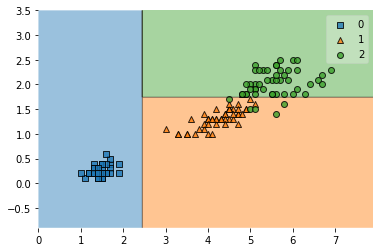

In [40]:
plot_decision_regions(x_iris,y_iris,tree_clf)

#### 重新生成一个决策树

设置 max_depth 参数为3。

In [47]:
tree_clf2 = DecisionTreeClassifier(max_depth=3)
tree_clf2.fit(x_iris,y_iris)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

####  绘制决策边界

可以看出，设置最大深度会影响决策边界

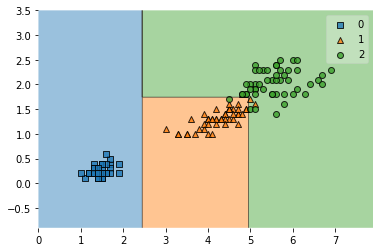

In [49]:
plot_decision_regions(x_iris,y_iris,tree_clf2)

### 决策树的决策边界

粗的垂直线代表根节点（深度为	0）的决定边界：花瓣长度 为	2.45	厘米。由于左侧区域是纯的（只有 Iris-Setosa），所以不能再进一步分裂。然而，右 边的区域是不纯的，所以深度为 1 的右边节点在花瓣宽度为 1.75 厘米处分裂（用虚线表示）。

又由于 max_depth 设置为 2，决策树在那里停了下来。但是，如果将 max_depth 设置为 3，两个深度为 2 的节点，每个都将会添加另一个决策边界（用虚线表示）。

#### 决策边界对比图 (max_depth=2/3)：

<img width="600" height="500" src="4.jpg"/>

#### 模型小知识：白盒与黑盒

__决策树__ 非常直观，他们的决定很容易被解释。这种模型通常被称为 __白盒模型__ 。相反， __随机森林__ 或 __神经网络__ 通常被认为是__黑盒模型__。


### 估计分类概率

决策树还可以估计某个实例属于特定类 __k__	的 __概率__ ：首先遍历树来查找此实例的叶节点，然后它返回此节点中类 k 的训练实例的比例。

In [50]:
from sklearn.model_selection import cross_val_predict

#### 预测为x类的概率

Iris-Setosa	为	0%（0/54），Iris-Versicolor	为 90.7%（49/54），Iris-Virginica	为	9.3%（5/54）

In [57]:
display(tree_clf.predict_proba([[5,1.5]]))
tree_clf.predict([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

array([1])

### 决策树回归

In [59]:
from sklearn.tree import DecisionTreeRegressor 

In [60]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x_iris,y_iris)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

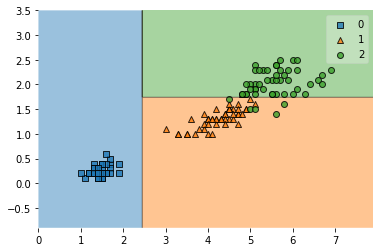

In [61]:
plot_decision_regions(x_iris,y_iris,tree_reg)

In [62]:
tree_reg2 = DecisionTreeRegressor(max_depth=3)
tree_reg2.fit(x_iris,y_iris)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

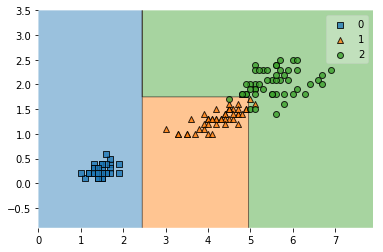

In [63]:
plot_decision_regions(x_iris,y_iris,tree_reg2)

### 练习：对	moons	数据集进行决策树训练并优化模型。


In [91]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn .model_selection import cross_validate

__1、通过语句	make_moons(n_samples=10000,	noise=0.4)	生成	moons	数据集__

In [68]:
x,y = datasets.make_moons(n_samples=10000, noise=0.4)

__2、通过	train_test_split()	将数据集分割为训练集和测试集__

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

__3、进行交叉验证，并使用网格搜索法寻找最好的超参数值（使用	GridSearchCV)__

提示:	尝试各种各样的	max_leaf_nodes	值

KFold:
* 提供训练/测试索引以将数据拆分为训练/测试集。将数据集拆分为k个连续的折叠（默认情况下不进行混洗）。


* 然后将每个折叠用作一次验证，而剩下的k-1个折叠形成训练集。

In [77]:
cv_split = KFold(10,shuffle=False,random_state=42)
param_grid = {'max_leaf_nodes':[3,5,8,10,15,25,40]}

In [81]:
dtree_clf = DecisionTreeClassifier()

In [86]:
grid_model = GridSearchCV(dtree_clf,param_grid=param_grid,scoring='roc_auc',cv=cv_split,return_train_score=True)
grid_model.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [3, 5, 8, 10, 15, 25, 40]},
   

In [92]:
print('After DT Parameters',grid_model.best_params_)
print('AFTER DT Training w/bin score mean: {:.2f}'.format(grid_model.cv_results_['mean_train_score'][grid_model.best_index_]))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(grid_model.cv_results_['mean_test_score'][grid_model.best_index_]))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}',grid_model.cv_results_['std_test_score'][grid_model.best_index_])
grid_model = grid_model.best_estimator_

After DT Parameters {'max_leaf_nodes': 25}
AFTER DT Training w/bin score mean: 0.94
AFTER DT Test w/bin score mean: 0.93
AFTER DT Test w/bin score 3*std: +/- {:.2f} 0.012739682375139356


In [95]:
cv_result = cross_validate(grid_model,x_test,y_test,cv = 5,scoring='roc_auc',return_train_score=True)

In [96]:
print('MLA Train Accuracy Mean',cv_result['train_score'].mean())
print('MLA Test Accuracy Mean',cv_result['test_score'].mean())
print('MLA Test std*3 ',cv_result['test_score'].std()*3)

MLA Train Accuracy Mean 0.9377568610098184
MLA Test Accuracy Mean 0.9053785856879891
MLA Test std*3  0.043774990646338524


In [90]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_leaf_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])